# Overview plots
This notebook makes some useful plots for presentation/paper purposes. For example, a regime diagram.

In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import h5py
from pylab import *
import scipy.integrate as integrate
#from cmocean import cm as cmo
import matplotlib.gridspec as gridspec
import matplotlib.ticker 
import scipy.stats as stats
import scipy.optimize as optimize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 24})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less_equal
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


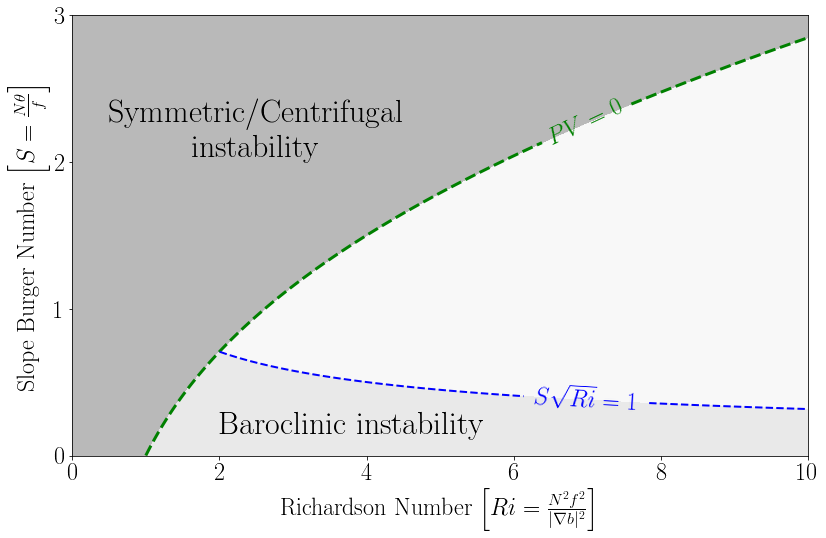

In [178]:
Ri = np.linspace(0, 10, 1000)
S = np.linspace(0, 3, 1000)
Rv, Sv = np.meshgrid(Ri, S)
alpha = Sv*np.sqrt(Rv)
small = False

if not small:
    plt.figure(figsize=(12,8))
else:
    plt.figure(figsize=(8,8))

PV = Sv*np.sqrt(Rv)/Rv + 1/Rv
maskSI = PV>1
maskBI = np.nan*np.zeros_like(Rv)
maskBI[np.logical_and(PV<=1, alpha<1)] = 1
# maskBI[np.logical_and(PV<=1, 1==1)] = 1

maskBIL = np.nan*np.zeros_like(Rv)
maskBIL[PV<=1] = 1
# maskBI = PV<=1
# maskBI[np.logical_not(maskBI)] = np.nan
cl = 8
plt.contourf(Rv, Sv, maskSI*3, np.linspace(0, cl, 10), cmap='Greys')
plt.contourf(Rv, Sv, maskBI*1, np.linspace(0, cl, 10), cmap='Greys')

# plt.contour(Rv, Sv, (1-Sv**2/(1+Sv**2))*Rv, [0, 1], colors='r')
# plt.contour(Rv, Sv, (Sv/(1+Sv)) + 1/Rv, [1], colors='r')
PVL = plt.contour(Rv, Sv, -1 + Sv*np.sqrt(Rv)/Rv + 1/Rv, [0], colors='g', linewidths=3, linestyles='dashed')
# plt.contour(Rv, Sv, alpha/Rv, [0.2], colors='b', linewidths=2, linestyles='dashed')
CL = plt.contour(Rv, Sv, alpha*maskBIL, [1], colors='b', linewidths=2, linestyles='dashed')
plt.clabel(CL, inline=1, fontsize = 24, fmt='$S\sqrt{Ri}$ $=$ %1.0f', manual=[(7, 0.5)])
plt.clabel(PVL, inline=1, fontsize = 24, fmt='$PV$ $=$ %1.0f', manual = [(7, 2.25)])
plt.yticks([0, 1, 2, 3])
# plt.contour(Rv, Sv, Sv*np.sqrt(Rv) + 1/Rv, [1], colors='g')

# plt.contour(Rv, Sv, np.sqrt(Sv*Rv)/Rv, [0, 1], colors='g')
# plt.contour(Rv, Sv, np.sqrt(Sv*Rv)/Rv, [0, 1], colors='g')
# plt.grid()
plt.xlabel('Richardson Number $\left[Ri = \\frac{N^2f^2}{|\\nabla b|^2}\\right]$')
plt.ylabel('Slope Burger Number $\left[S = \\frac{N\\theta}{f}\\right]$')

if small:
    plt.annotate('Symmetric/Centrifugal\n instability',
                 xy=(0.35, 2.25), xycoords='data', xytext=(+0, +0), 
                 textcoords='offset points', fontsize=32, ma='center')
    plt.annotate('Baroclinic instability',
                 xy=(1.75, 0.1), xycoords='data', xytext=(+0, +0), 
                 textcoords='offset points', fontsize=32, ma='center')
else:
    plt.annotate('Symmetric/Centrifugal\n instability',
                 xy=(0.5, 2.05), xycoords='data', xytext=(+0, +0), 
                 textcoords='offset points', fontsize=32, ma='center')
    plt.annotate('Baroclinic instability',
                 xy=(2., 0.15), xycoords='data', xytext=(+0, +0), 
                 textcoords='offset points', fontsize=32, ma='center')
plt.tight_layout()
plt.savefig('RegimeDiagram_large.eps', bbox_inches='tight', pad_inches=0.1)

Text(0,0.5,'Ratio of boundary layer to\n interior stratification $\\left[\\frac{N^2}{N_o^2}\\right]$')

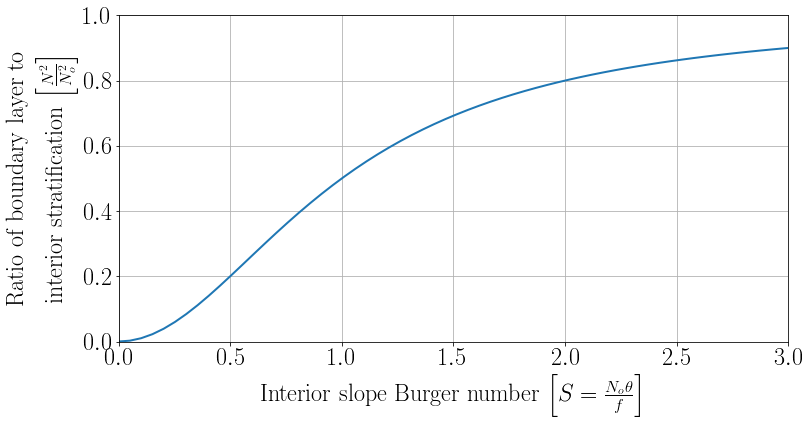

In [162]:
# Make N^2/N_o plot
# From Allen and Newberger, N^2_BL = No^2*(1-gamma)
# Therefore N^2_BL/N^2_o = S^2/(1+S^2)

S = np.linspace(0, 5, 100)
plt.figure(figsize=(12, 6))
plt.plot(S, S**2/(1+S**2), linewidth=2)

plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 3)
plt.xlabel('Interior slope Burger number $\left[S = \\frac{N_o\\theta}{f}\\right]$')
plt.ylabel('Ratio of boundary layer to\n interior stratification $\left[\\frac{N^2}{N_o^2}\\right]$')